<p style="text-align: center; font-weight:bold; color:yellow; font-size: 24px">Part A _ Data Preparation (80%) <br/>

To start, the necessary libraries and packages are imported, and further steps will be undertaken as needed. Subsequently, the dataset is read from a .csv file.

In [48]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# Load the dataset
df = pd.read_csv('complaints.csv')
df

,complaint_no,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
162416,162416,debt_collection,name
162417,162417,credit_card,name
162418,162418,debt_collection,name
162419,162419,credit_card,name


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   complaint_no  162421 non-null  int64 
 1   product       162421 non-null  object
 2   narrative     162411 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


<p style="text-align: left; font-weight:bold; font-size: 18px">EDA & Text Preprocessing (30%): <br/>

By specifying the column names in the dropna() command, it ensures that only the specified columns mentioned in the question are considered, and any other irrelevant columns are excluded. Additionally, duplicated rows are removed, and the number of null values is checked using the isnull().sum() command.

In [51]:
# Remove any irrelevant columns or entries & handle any missing or null values
df = df[['complaint_no', 'product', 'narrative']].dropna()

# Remove duplicated rows
df = df.drop_duplicates(keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162411 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   complaint_no  162411 non-null  int64 
 1   product       162411 non-null  object
 2   narrative     162411 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.0+ MB


In [52]:
# Check if there are any null values
pd.isnull(df).sum()

complaint_no    0
product         0
narrative       0
dtype: int64

The exploration of each product/service is calculated and presented as follows. It is observed that the credit_reporting service receives the highest number of complaints, with 91,172 complaints, while the retail_banking service has the smallest number of complaints, with 13,535.

In [53]:
# Explore the distribution of products/services in the dataset
product_distribution = df['product'].value_counts()
product_distribution

product
credit_reporting       91172
debt_collection        23148
mortgages_and_loans    18990
credit_card            15566
retail_banking         13535
Name: count, dtype: int64

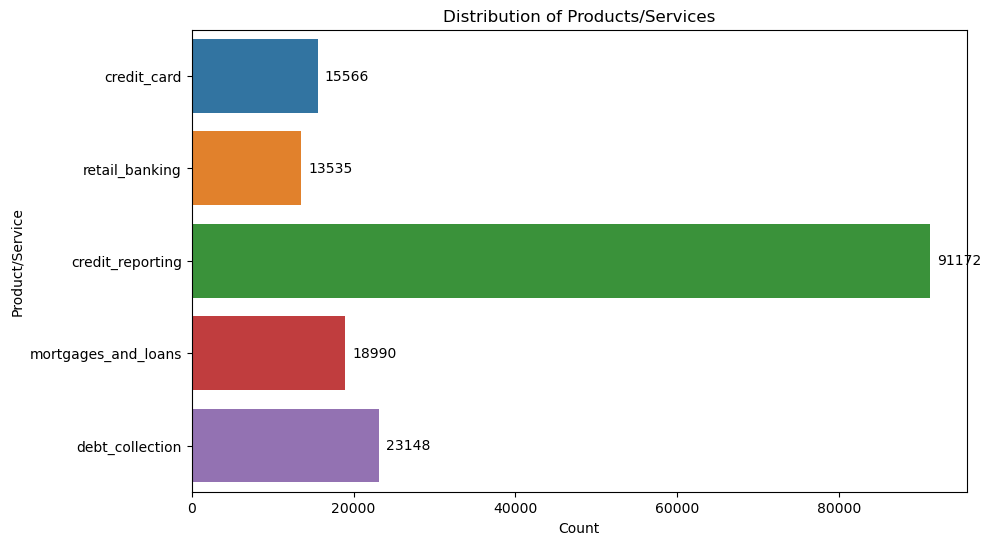

In [54]:
plt.figure(figsize=(10,6))
ax = sns.countplot(y='product', data=df)

# Add count labels on each bar
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                   (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2), 
                   ha = 'left', va = 'center', 
                   xytext = (5, 0), 
                   textcoords = 'offset points')

plt.title('Distribution of Products/Services')
plt.xlabel('Count')
plt.ylabel('Product/Service')
plt.show()

The histogram depicting the number of customers' narratives against the length of narratives is shown below. It is observed that the majority of narratives are short, with the highest count observed for narratives containing approximately 0-100 words. As the length of the narrative increases, the count decreases sharply, indicating fewer occurrences of longer narratives in the dataset. Narratives longer than approximately 1000 words are very rare.</br>
This insight is valuable for text preprocessing and model configuration. For example, it suggests setting a suitable maximum sequence length for the BI-LSTM model. Additionally, understanding the typical length of customer narratives can provide insights into customer behavior and help improve services.

/home/momi75/miniconda3/envs/IAI5101/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


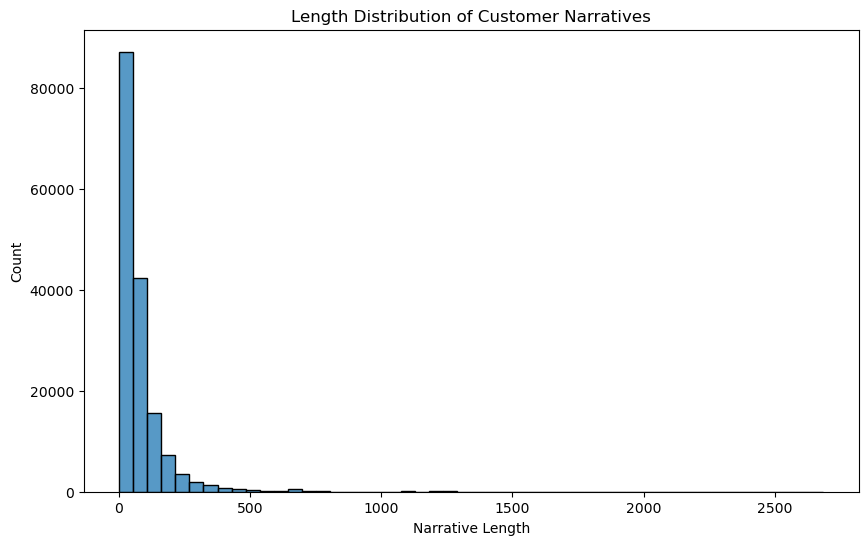

In [55]:
# Analyze the length distribution of customer narratives
df['narrative_length'] = df['narrative'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,6))
sns.histplot(df['narrative_length'], bins=50)
plt.title('Length Distribution of Customer Narratives')
plt.xlabel('Narrative Length')
plt.ylabel('Count')
plt.show()

In [56]:
df

,complaint_no,product,narrative,narrative_length
0,0,credit_card,purchase order day shipping amount receive pro...,230
1,1,credit_card,forwarded message date tue subject please inve...,132
2,2,retail_banking,forwarded message cc sent friday pdt subject f...,173
3,3,credit_reporting,payment history missing credit report speciali...,131
4,4,credit_reporting,payment history missing credit report made mis...,123
...,...,...,...,...
162416,162416,debt_collection,name,1
162417,162417,credit_card,name,1
162418,162418,debt_collection,name,1
162419,162419,credit_card,name,1


In text preprocessing, the columns containing text data (i.e., "product" and "narrative") are essential to be considered. Given that the objective is to analyze customer narrative complaints, higher priority is given to exploring and addressing the "narrative" column. Narratives without specifying the "product" are meaningless in this dataset. Therefore, both the "narrative" and "product" columns have been retained, while the rest have been removed. This was executed using the drop() command in the following cell.

In [57]:
# Remove irrelevant columns (digit-based)
df.drop(columns=['complaint_no', 'narrative_length'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162411 entries, 0 to 162420
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   product    162411 non-null  object
 1   narrative  162411 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


For text preprocessing, the preprocessing_text function has been defined. Prior to that, the required libraries and the nltk toolkit have been imported.

1- Lowercasing: All characters in the text are converted to lowercase.</br>
2- Expanding contractions: Contractions are expanded (e.g., “don’t” becomes “do not”).</br>
3- Removing numbers: All digits are removed from the text.</br>
4- Removing punctuation: All punctuation marks are removed from the text.</br>
5- Autocorrecting codes and characters: The Unicode representation of the text is normalized to the ‘NFKD’ form and encoded/decoded to/from ASCII.</br>
6- Removing double spaces: Multiple spaces are replaced with a single space.</br>
7- Tokenization: The text is split into individual words (tokens).</br>
8- Lemmatization: Each word is reduced to its base or root form (lemma).</br>
9- Removing stopwords: Common words (e.g., “is”, “the”, “and”) that do not carry much meaning are removed.</br>
10- Joining tokens: The preprocessed tokens are joined back into a single string.</br></br>
Finally, the preprocessed text is applied to the text column (narrative) using the apply function.

In [58]:
import re
import unicodedata
import contractions
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer


# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#Define the preprocessing function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Expand contractions
    text = contractions.fix(text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Autocorrect codes and characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # Remove double spaces
    text = re.sub(r'\s+', ' ', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    text = ' '.join(tokens)
    return text

[nltk_data] Downloading package punkt to /home/momi75/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/momi75/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/momi75/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [59]:
# Apply preprocessing steps to "narrative"
df['narrative'] = df['narrative'].apply(preprocess_text)

The code in the following cell reveals the ten most common words. Among all narratives, the word "account" appears most frequently, with 325,577 repetitions.

In [142]:
from collections import Counter

# Join all the elements in 'narrative' into a single string where each element is separated by a space
all_words = ' '.join(df['narrative']).split()

# Create dictionary of unique words as keys and their frequncies as values
word_freq = Counter(all_words)

# Get the most common words
common_words = word_freq.most_common(10)
print(common_words)

[('account', 325577), ('credit', 317561), ('report', 177193), ('information', 143538), ('payment', 127725), ('reporting', 94522), ('time', 82905), ('company', 79449), ('would', 79336), ('day', 77044)]


According to the result obtained from the following cell, the product "credit_reporting" is the one that customers have complained about the most, with a total of 91,172 complaints.

In [86]:
# Group the data by 'product' and calculate the size of each group
product_complaints = df.groupby('product').size().reset_index(name='count')
print(product_complaints)

               product  count
0          credit_card  15566
1     credit_reporting  91172
2      debt_collection  23148
3  mortgages_and_loans  18990
4       retail_banking  13535


Passive voice:
The pie chart has been chosen to display the distribution of complaints across five categories:

- Credit Reporting: 56.1%
- Debt Collection: 14.3%
- Mortgages/Loans: 11.7%
- Retail Banking: 8.3%
- Credit Card: 9.6%

It is indicated that the majority of complaints (56.1%) are related to credit reporting, followed by debt collection (14.3%), mortgages/loans (11.7%), retail banking (8.3%), and credit card (9.6%).

Additionally, the wordcloud package is applied to show the wordcloud, where the size of each word indicates its frequency. The most prominent words are “credit", "report”, “account”, and “payment”. This suggests that these are common issues consumers face and frequently mention in their complaints.

In summary, a significant portion of consumer complaints is related to issues with credit reporting, including concerns about accuracy, identity theft, and dealings with reporting agencies. This aligns with the data from the pie chart, where credit reporting was the most common category for complaints. This could indicate a need for better practices or regulations in the area of credit reporting that the company has to consider.

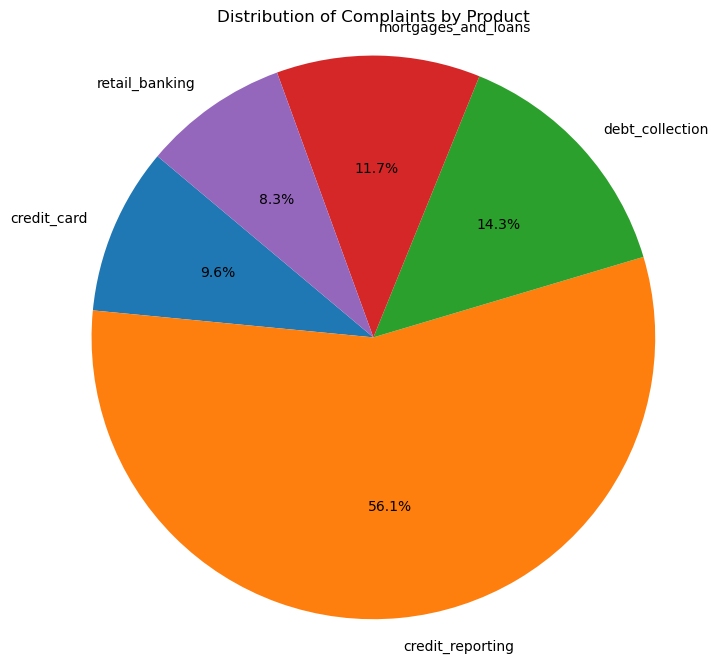

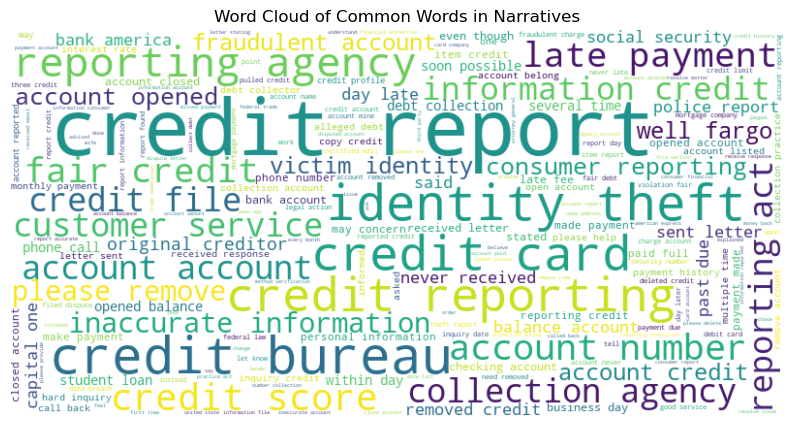

In [64]:
from wordcloud import WordCloud

# Pie chart of product distribution
plt.figure(figsize=(8, 8))
plt.pie(product_complaints['count'], labels=product_complaints['product'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Complaints by Product')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Word cloud of common words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Words in Narratives')
plt.show()


In the feature engineering for text representation, it is recognized that the text needs to be converted into numbers to be comprehensible for ML and DL algorithms. To achieve this, the "LabelEncoder()" function and one-hot encoding for the "product" are applied. Since there are multiple categories as targets, the one-hot method is chosen.

The LabelEncoder converts categorical labels into a numeric format (integer labels) by assigning each unique category in the data an integer value. Conversely, one-hot encoding is a process of converting integer labels into binary vectors, where each integer value is represented as a binary vector with all values as zero except for the index marked with a 1. This is why the LabelEncoder is applied to the target values before one-hot encoding.

In [143]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Fit the label encoder and transform the 'product' data to integer labels
integer_labels = le.fit_transform(df['product'])

# Convert 'product' to one-hot encoding
y = to_categorical(integer_labels)

Class imbalance occurs when one class has significantly more observations than another class. This imbalance can result in biased models that perform poorly on minority classes, as the model may learn to predict the majority class more accurately while ignoring the minority class.

To address the class imbalance, oversampling of the minority classes is implemented. It is important to note that this should be applied after splitting the data into training and testing sets. This approach is chosen because:

When splitting the data into training and validation sets, the objective is to create a realistic scenario where there are some data (the training set) to build the model and some unseen data (the validation set) to evaluate how well the model generalizes to new, unseen data.

If oversampling is applied before splitting the data, synthetic observations are created based on the entire dataset, and some of these synthetic observations may end up in the validation set. Consequently, the validation set would no longer consist entirely of new, unseen data because it would contain information used to create synthetic samples in the training set. This situation can lead to overly optimistic performance estimates.

By applying oversampling after splitting the data, it ensures that the synthetic samples in the training set are created solely based on the information in the training set. This keeps the validation set completely separate and composed only of real, unseen data, providing a more realistic evaluation of the model’s performance.

In [145]:
# Check class imbalance
class_counts = df['product'].value_counts()
print(class_counts)

product
credit_reporting       91172
debt_collection        23148
mortgages_and_loans    18990
credit_card            15566
retail_banking         13535
Name: count, dtype: int64


As explained in the previous section, the oversampling process for minority classes is applied to address the class imbalance. The splitting of train/validation data is performed by applying the "train_test_function" from the sklearn.model_selection library, dedicating eighty percent of the data to training and the rest to validation.

In [147]:
from sklearn.model_selection import train_test_split
import numpy as np

# Separate the different classes
class_indices = [np.where(integer_labels == i)[0] for i in range(y.shape[1])]

# Get the number of samples in the largest class
max_samples = max(len(indices) for indices in class_indices)

# Oversample the minority classes
for i, indices in enumerate(class_indices):
    num_samples_to_add = max_samples - len(indices)
    if num_samples_to_add > 0:
        # Randomly select samples from this class to duplicate
        samples_to_add = np.random.choice(indices, size=num_samples_to_add)
        # Add the new samples to the dataset
        df = pd.concat([df, df.iloc[samples_to_add]], ignore_index=True)

# Now all classes have the same number of samples
print(df['product'].value_counts())

product
credit_card            91172
retail_banking         91172
credit_reporting       91172
mortgages_and_loans    91172
debt_collection        91172
Name: count, dtype: int64


In [ ]:

# Split the dataset into training and validation sets (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(df['narrative'], df['product'], test_size=0.2, random_state=42)

<p style="text-align: left; font-weight:bold; font-size: 18px">Bi-LSTM Model Development (25%): <br/>

1-1- Tokenization:</br>
Tokenization is the process of converting text data into sequences of tokens (words or characters).
The "Tokenizer" is a class provided by Keras that facilitates tokenization.
Moreover, the "fit_on_texts" method of Tokenizer is used to update the internal vocabulary based on a list of texts (X_train).</br></br>
1-2- Padding:</br>
Padding ensures that all sequences have the same length by adding zeros (or another specified value) to sequences that are shorter than the maximum length or truncating longer sequences.
The "pad_sequences" function from "Keras preprocessing" is used to pad the sequences.
The "maxlen" parameter specifies the maximum length of sequences after padding.</br></br>
1-3- Word Embedding:</br>
The built-in Embedding layer of Keras without pre-trained embeddings has been applied here. This layer will learn the embeddings for words during the training process.</br></br>
2- BI-LSTM model architecture for classification:</br>
A Sequential model in Keras, which is a linear stack of layers, defines this model.</br></br>
The first layer is the Embedding layer, which was explained under the "1-3" section. It is responsible for converting integer-encoded vocabulary indices into dense vectors of fixed size (output_dim=100).</br></br>
The second layer is a Bidirectional LSTM layer with 64 units. The Bidirectional LSTM processes the input sequence in both forward and backward directions, capturing information from both past and future states.</br></br>
A Dropout layer is added to prevent overfitting by randomly setting a fraction of input units to zero during training.</br></br>
The final layer is a Dense layer with a single neuron and sigmoid activation function, used for binary classification.</br>
In the compile model section, the model is used for training.</br></br>
The "adam" optimizer is used, which is an efficient and popular optimization algorithm. Also, the "binary_crossentropy" loss function is used for binary classification tasks.</br></br>
And finally, the "accuracy" metric is used to evaluate the performance of the model during training and testing.</br></br>
In conclusion, the model summary is printed. By reviewing this model, the following interpretations can emerge:</br>
The model summary is shown following the cell.

In [150]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# Set the maximum number of words in your vocabulary
max_vocab = 10000

# Set the maximum length for sequences
max_length = 100

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=max_vocab, oov_token="<OOV>")

# Fit the tokenizer on your text data
tokenizer.fit_on_texts(X_train)

# Tokenize the text data
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)

# Pad the sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_length, padding='post', truncating='post')

# Define the model
model = Sequential()

# Add an Embedding layer
model.add(Embedding(input_dim=max_vocab, output_dim=64))

# Add a Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64, return_sequences=True)))

# Add a Dropout layer
model.add(Dropout(0.5))

# Add another Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64)))

# Add a Dense layer with softmax activation
model.add(Dense(5, activation='softmax')) # 5 is the number of classes

# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Build the model
model.build(input_shape=(None, max_length))

# Print the model summary
model.summary()



Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 100, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_14                │ (None, 100, 128)       │        66,048 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_15                │ (None, 128)            │        98,816 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 805,509 (3.07 MB)

 Trainable params: 805,509 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

After completing all the previous sections, it is necessary to train the built model using the fit function. However, before that, the fit_transform method is applied to the training data to both fit the label encoder (i.e., learn the encoding based on the unique values in y_train) and transform the training data into encoded labels.</br>
For the validation data, only the transformation of the data into the learned encoding is needed, so the transform method is used. The label encoder is not fitted to the validation data because the validation data should consist of unseen data that is used to evaluate the performance of the model. Fitting the label encoder to the validation data may result in learning a different encoding if there are unique values in y_val that are not present in y_train, leading to inconsistencies and incorrect evaluation of the model’s performance.</br>
The original labels are saved to be utilized in the Model Evaluation section.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Initialize the label encoder
le = LabelEncoder()

# Fit the label encoder and transform the 'product' data to integer labels
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train_encoded)
y_val_one_hot = to_categorical(y_val_encoded)

# Get the original labels
original_labels = le.classes_

The results of fitting the model using 10 epochs and a batch size of 32 are depicted after the following cell. It can be observed that the accuracy gradually improved from almost 83% to almost 98%, and the loss decreased accordingly.

In [153]:
# Specify the number of epochs and batch size
epochs = 10  # Example: Train for 10 epochs
batch_size = 32  # Example: Use a batch size of 32

# Train the model
history = model.fit(X_train_padded, y_train_one_hot,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val_padded, y_val_one_hot))

# Print the training history
print(history.history)


Epoch 1/10


11397/11397 ━━━━━━━━━━━━━━━━━━━━ 1806s 158ms/step - accuracy: 0.8355 - loss: 0.4861 - val_accuracy: 0.8863 - val_loss: 0.3376
Epoch 2/10
11397/11397 ━━━━━━━━━━━━━━━━━━━━ 1839s 161ms/step - accuracy: 0.9063 - loss: 0.2853 - val_accuracy: 0.9210 - val_loss: 0.2440
Epoch 3/10
11397/11397 ━━━━━━━━━━━━━━━━━━━━ 1807s 159ms/step - accuracy: 0.9319 - loss: 0.2085 - val_accuracy: 0.9372 - val_loss: 0.1950
Epoch 4/10
11397/11397 ━━━━━━━━━━━━━━━━━━━━ 1905s 167ms/step - accuracy: 0.9486 - loss: 0.1577 - val_accuracy: 0.9485 - val_loss: 0.1669
Epoch 5/10
11397/11397 ━━━━━━━━━━━━━━━━━━━━ 1783s 156ms/step - accuracy: 0.9599 - loss: 0.1237 - val_accuracy: 0.9559 - val_loss: 0.1443
Epoch 6/10
11397/11397 ━━━━━━━━━━━━━━━━━━━━ 1677s 147ms/step - accuracy: 0.9675 - loss: 0.1005 - val_accuracy: 0.9598 - val_loss: 0.1349
Epoch 7/10
11397/11397 ━━━━━━━━━━━━━━━━━━━━ 1616s 142ms/step - accuracy: 0.9725 - loss: 0.0851 - val_accuracy: 0.9634 - val_loss: 0.1282
Epoch 8/10
11397/11397 ━━━━━━━━━━━━━━━━━━━━ 1647s 14

In [154]:
df.to_csv('complaints_preprocessed.csv', index=False)

<p style="text-align: left; font-weight:bold; font-size: 18px">Model Evaluation, Interpretation & Comparison (25%): <br/>

In [ ]:
import pandas as pd
df = pd.read_csv("complaints_preprocessed.csv")

After the deep learning model is fitted on the training data, the model's performance is tested on the validation set. Since the model took approximately an hour on Google Colab to be trained, the results are saved separately for record-keeping. Despite the data type being ndarray, it is preferred to save them in a CSV file for convenience.

In [ ]:
y_pred = model.predict(X_val_padded)

np.savetxt("y_pred.csv", y_pred, delimiter=",")
np.savetxt("y_onehot.csv", y_val_one_hot, delimiter=",")

In [ ]:
y_pred = (pd.read_csv("y_pred.csv")).to_numpy()
y_val_one_hot = (pd.read_csv("y_onehot.csv")).to_numpy()

Since the confusion matrix does not accept one-hot encoded data, the target values must be converted back to categorical ones before analyzing the results in the next sections.

In [ ]:
import numpy as np


# Convert one-hot encoded labels back to categorical labels
y_pred_categorical = np.argmax(y_pred, axis=1)
y_test_categorical = np.argmax(y_val_one_hot, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix

# Build confusion matrix
conf_matrix = confusion_matrix(y_test_categorical, y_pred_categorical)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[18085    52   112    37    27]
 [  415 16768   759   314    77]
 [   47   299 17691    54     8]
 [  154   124    83 17619    30]
 [   27    14     9    15 18351]]


As evident from the results in the previous cell, a 5x5 array represents a multiclass confusion matrix, which differs slightly from the conventional one. Each row signifies the actual class, while each column signifies the predicted class. With this understanding, data extraction is carried out accordingly. Five matrices are created for the original five categories to evaluate the model's performance on each of them. To clarify, let's consider the fourth category as an example. TP corresponds to the value at index [4,4] in the matrix, which is 17619. FP is the sum of every value in the fourth row (excluding TP), and FN is the sum of every value in the fourth column (excluding TP). Finally, TN is calculated by subtracting the sum of every value in the matrix from TP, FP, and FN. Since this process needs to be repeated five times, a function is implemented for it. The function also computes the other required metrics for each category. Metrics such as average accuracy and precision are crucial for obtaining a comprehensive understanding of the model's performance.

In [ ]:
def separate_confusion_matrices(conf_matrix, labels):
    
    average_accuracy , average_precision, average_recall, average_F1 = 0,0,0,0
    
    for i in range(len(conf_matrix)):
        TP = conf_matrix[i,i]
        FP = np.sum(np.delete(conf_matrix[i], i))
        FN = np.sum(np.delete(conf_matrix[:, i], i))
        TN = np.sum(conf_matrix) -  TP - FP - FN
        
        accuracy = (TP + TN) / (TP + FP + TN + FN)
        average_accuracy += (accuracy/len(conf_matrix))
        
        precision = TP / (TP + FP)
        average_precision += (precision/len(conf_matrix))
        
        recall = TP / (TP + FN)
        average_recall += (recall/len(conf_matrix))
        
        F1 = (2*precision*recall) / (precision + recall)
        average_F1 += (F1/len(conf_matrix))
                
        yield (f"\n\033[1m{labels[i]}:\033[0m\n[[{TP, FP}],\n[{FN, TN}]],\n\n"
               f"accuracy: {round(accuracy, 2)}, precision: {round(precision,2)}, recall: {round(recall, 2)}, F1: {round(F1,2)}\n"
               f"..................................................")
        
    yield (f"\033[1;32maverage_accuracy: {round(average_accuracy,2)} , average_precision: {round(average_precision,2)},"
           f"average_recall: {round(average_recall,2)}, average_F1: {round(average_F1,2)}\033[0m")


In [ ]:
for sub_matrix in separate_confusion_matrices(conf_matrix, original_labels):
    print(sub_matrix)


credit_card:
[[(18085, 228)],
[(643, 72215)]],

accuracy: 0.99, precision: 0.99, recall: 0.97, F1: 0.98
..................................................

credit_reporting:
[[(16768, 1565)],
[(489, 72349)]],

accuracy: 0.98, precision: 0.91, recall: 0.97, F1: 0.94
..................................................

debt_collection:
[[(17691, 408)],
[(963, 72109)]],

accuracy: 0.98, precision: 0.98, recall: 0.95, F1: 0.96
..................................................

mortgages_and_loans:
[[(17619, 391)],
[(420, 72741)]],

accuracy: 0.99, precision: 0.98, recall: 0.98, F1: 0.98
..................................................

retail_banking:
[[(18351, 65)],
[(142, 72613)]],

accuracy: 1.0, precision: 1.0, recall: 0.99, F1: 0.99
..................................................
average_accuracy: 0.99 , average_precision: 0.97,average_recall: 0.97, average_F1: 0.97


As observed from the results, the model's performance is quite satisfactory. The lowest precision is attributed to credit_reporting, with a value of 0.91, which is still commendable. This suggests that when the model predicts narratives related to credit_reporting, it is accurate approximately 91% of the time, indicating strong performance. The highest metrics are recorded for the retail_banking category, with 100% accuracy and precision, and 99% for recall and F1 score. Other categories also exhibit high scores across various metrics.

On average, however, the model demonstrates exceptional performance with nearly flawless accuracy and 97% on other metrics. With this in mind, it can be inferred that Bi-LSTM models are highly effective in predicting these types of data.

After the completion of the fitting process, four metrics were provided by Keras, which were stored in the history dictionary. Upon plotting them, the following conclusions can be drawn:

Regarding the accuracy, both training and validation accuracies show a steady increase over epochs, indicating effective learning from the training data and successful generalization to unseen validation data. The validation accuracy closely mirrors the training accuracy, suggesting robust generalization to new data. The absence of a significant gap between the training and validation accuracies implies that the model is not overfitting to the training data.

Regarding the losses, both training and validation losses exhibit consistent decrease over epochs, signaling improvement in the model's predictive performance. The validation loss closely tracks the training loss, indicating minimal overfitting to the training data. There is no notable divergence or plateauing of the validation loss while the training loss continues to decrease, suggesting that overfitting is not a significant concern.

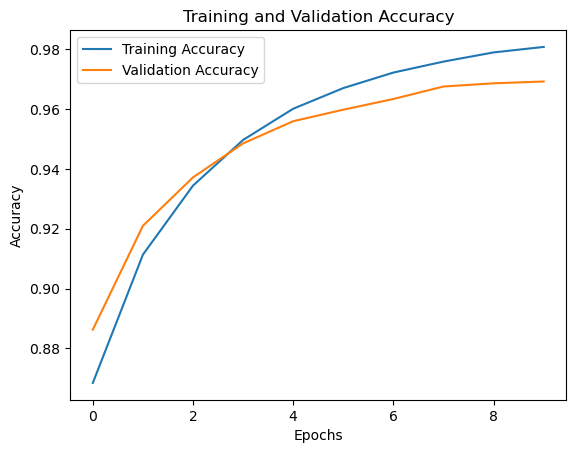

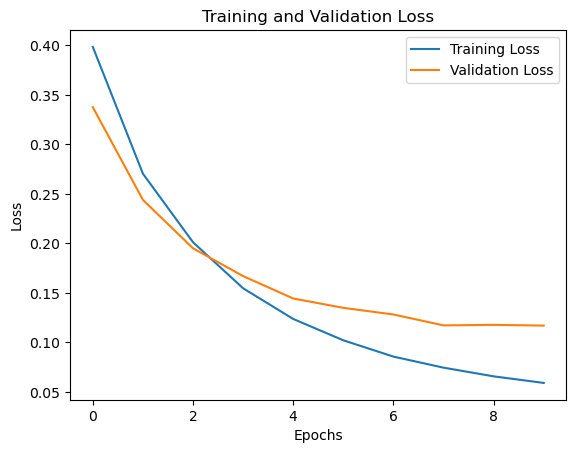

In [ ]:
import matplotlib.pyplot as plt

# Data
history = {
    'accuracy': [0.8684574365615845, 0.9113351702690125, 0.9344179034233093, 0.9496802687644958, 0.9601083397865295, 0.9670101404190063, 0.9721981287002563, 0.9758642911911011, 0.9789271950721741, 0.9807643890380859],
    'loss': [0.3985077142715454, 0.27042117714881897, 0.2011333405971527, 0.1546439528465271, 0.12364702671766281, 0.10209210216999054, 0.08561540395021439, 0.0744505450129509, 0.0656699612736702, 0.05902745574712753],
    'val_accuracy': [0.8862589597702026, 0.920973539352417, 0.9371626973152161, 0.9485258460044861, 0.9559404253959656, 0.9597793221473694, 0.9633659720420837, 0.9675338864326477, 0.9685978293418884, 0.9692120552062988],
    'val_loss': [0.3375956416130066, 0.2439546138048172, 0.19504019618034363, 0.1669369339942932, 0.14434117078781128, 0.13486826419830322, 0.12816928327083588, 0.1171632930636406, 0.11767999827861786, 0.11695421487092972]
}

# Plot training and validation accuracy
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


The notable difference between traditional classifiers and the Bi-LSTM lies in how long they take to train. Even with Colab Pro, the Random Forest Classifier needed a whopping 10 hours to train, which hints at the Bi-LSTM's superiority. The Bi-LSTM, on the other hand, only took around 100 minutes to train, with each epoch lasting about 10 minutes. This big gap in training time shows that the Bi-LSTM is much more efficient, especially when dealing with sequential data where order matters.

When it comes to evaluating how well the models perform, the Bi-LSTM shines. It consistently achieves almost perfect scores in accuracy, precision, recall, and F1 scores. This means it's really good at correctly classifying data and avoiding mistakes. The Bi-LSTM's strong performance confirms its effectiveness in handling various tasks, from understanding language to predicting future trends in data. In contrast, traditional classifiers struggle to match up, highlighting the Bi-LSTM's edge in today's machine learning landscape.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model
rf_classifier.fit(X_train_padded, y_train_one_hot)

# Predict on validation set
rf_predictions = rf_classifier.predict(X_val_padded)

# Calculate accuracy
rf_accuracy = accuracy_score(y_val_one_hot, rf_predictions)
print("Random Forest Classifier Accuracy:", rf_accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_val_one_hot, rf_predictions))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val_one_hot.argmax(axis=1), rf_predictions.argmax(axis=1)))


In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Assuming multinomial data

# Create the Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train_padded, y_train_one_hot)

# Predict on validation set
nb_predictions = model.predict(X_val_padded)

# Calculate accuracy
nb_accuracy = accuracy_score(y_val_one_hot, nb_predictions)
print("Multinomial Naive Bayes Accuracy:", nb_accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_val_one_hot, nb_predictions))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val_one_hot.argmax(axis=1), nb_predictions.argmax(axis=1)))
